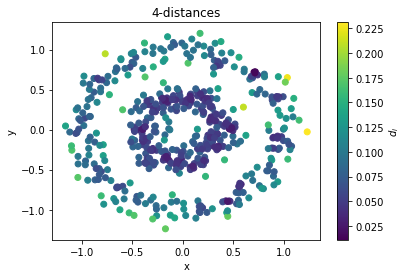

In [14]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

np.random.seed(1337)
data = datasets.make_circles(n_samples=500, noise=0.1, factor=0.4)[0]

nbrs = NearestNeighbors(n_neighbors=4, algorithm='auto').fit(data)
distances, indices = nbrs.kneighbors(data)
k_dists = distances[:,3]

plt.scatter(data[:,0], data[:,1], c=k_dists, cmap='viridis')
plt.title("4-distances")
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar().set_label("$d_i$")
plt.show()

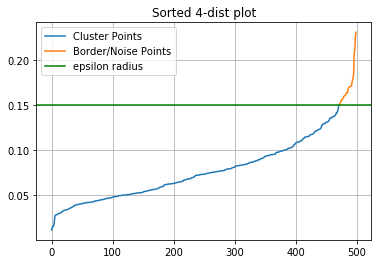

In [15]:
sorted = np.sort(k_dists)

epsilon = 0.15

clusterpoint = np.ma.masked_where(sorted > epsilon, sorted)
bordernoise = np.ma.masked_where(sorted < epsilon, sorted)

plt.grid()
plt.plot(clusterpoint, label="Cluster Points")
plt.plot(bordernoise, label="Border/Noise Points")
plt.axhline(y=epsilon, xmin=0, xmax=1, label="epsilon radius", color='green')
plt.title("Sorted 4-dist plot")
plt.legend()
